<a href="https://colab.research.google.com/github/akhunzakp/Machine-Learning2025/blob/main/UTS_Yuma_Akhunza_K_P_2341720259_TI_3I.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Midterm Machine Learning 2025**

Yuma Akhunza Kausar Putra

2341720259

19

TI - 3I

# Dataset

Download the dataset from https://storage.googleapis.com/kuliah_mah/UTS2526.zip and use the data according to the case study obtained.

use this data : /content/drive/MyDrive/Yok/1_house_prince_advance.csv


# Case Study 1 - House Price Clustering

- For students with attendance numbers 1, 4, 7, 10, etc.
- Perform the following steps and analyze the results.

## Data Preprocessing (30 points)

1. Load the dataset. (5 points)
2. Drop columns 'Id' and 'MSSubClass'. (5 points)
3. Drop all qualitative variables. (5 points)
4. Drop variables with less than 5 missing values. (5 points)
5. Perform data imputation on missing data. Attach your analysis explaining why you used the chosen imputation method. (10 points)

## Feature Selection (20 points)
1. Select your top 10 variables from all available variables. (10 points)
2. How did you select these 10 variables? Explain your reasoning. (10 points)

## Clustering - 1 (30 points)

1. Create a cluster model using KMeans with the number of clusters from 1 to 10. (10 points)
2. Create an elbow diagram, determine the best number of clusters according to the elbow method, and provide your reasoning. (10 points)
3. Calculate the silhouette coefficient value for k=1 to k=10. Based on the silhouette value, what is the best number of clusters? Is it the same as the elbow method? (10 points)

NB: You are allowed to perform normalization/standardization before building the clustering model. Observe the clustering results.

## Clustering - 2 (20 points)

1. Create a cluster model using DBSCAN. How many clusters are produced? (10 points)
2. What are the silhouette coefficient and DBI values of the clusters produced by DBSCAN? (10 points)

## BONUS - CHALLENGE (30 points)

Perform the feature selection process. Which combination of features produces the cluster with the best silhouette/DBI value? What is the number of clusters?

NB: You can use an iterative process in this case. Other methods are also allowed. Provide your reasons for choosing the method.

# **Data Preprocessing (30 points)**

## 1. Load the dataset. (5 points)

Load the dataset from '/content/drive/MyDrive/Yok/1_house_prince_advance.csv' into a pandas DataFrame.

**Reasoning** :

We'll use the pandas library to load the dataset file into a table-like structure called a DataFrame. Then, we'll show the first few rows of the table to make sure it loaded correctly.

In [1]:
import pandas as pd

df = pd.read_csv('/content/1_house_prince_advance.csv')
display(df.head())

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0


## 2. Drop columns 'Id' and 'MSSubClass'. (5 points)

Drop the 'Id' and 'MSSubClass' columns from the DataFrame.

**Reasoning** :

Drop the specified columns 'Id' and 'MSSubClass' from the DataFrame as per the instructions and display the head and columns to verify the changes.



In [2]:
df.drop(['Id', 'MSSubClass'], axis=1, inplace=True)
display(df.head())
display(df.columns)

,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0


Index(['MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape',
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces',
       'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'Op

## 2. Drop columns 'Id' and 'MSSubClass'. (5 points)

Remove the 'Id' and 'MSSubClass' columns from our data table (DataFrame).

**Reasoning** :

Remove the specified columns 'Id' and 'MSSubClass' from the DataFrame as per the instructions and show the first few rows and columns to check that they were removed.

In [3]:
qualitative_cols = df.select_dtypes(include='object').columns
df.drop(columns=qualitative_cols, inplace=True)
display(df.head())
display(df.info())

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,150.0,...,0,61,0,0,0,0,0,2,2008,208500.0
1,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,284.0,...,298,0,0,0,0,0,0,5,2007,181500.0
2,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,434.0,...,0,42,0,0,0,0,0,9,2008,223500.0
3,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,540.0,...,0,35,272,0,0,0,0,2,2006,140000.0
4,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,490.0,...,192,84,0,0,0,0,0,12,2008,250000.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 36 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   LotFrontage    2433 non-null   float64
 1   LotArea        2919 non-null   int64  
 2   OverallQual    2919 non-null   int64  
 3   OverallCond    2919 non-null   int64  
 4   YearBuilt      2919 non-null   int64  
 5   YearRemodAdd   2919 non-null   int64  
 6   MasVnrArea     2896 non-null   float64
 7   BsmtFinSF1     2918 non-null   float64
 8   BsmtFinSF2     2918 non-null   float64
 9   BsmtUnfSF      2918 non-null   float64
 10  TotalBsmtSF    2918 non-null   float64
 11  1stFlrSF       2919 non-null   int64  
 12  2ndFlrSF       2919 non-null   int64  
 13  LowQualFinSF   2919 non-null   int64  
 14  GrLivArea      2919 non-null   int64  
 15  BsmtFullBath   2917 non-null   float64
 16  BsmtHalfBath   2917 non-null   float64
 17  FullBath       2919 non-null   int64  
 18  HalfBath

None

## 4. Drop variables with less than 5 missing values. (5 points)

Find and remove columns that have fewer than 5 missing data points.

**Reasoning** :

First, we'll count how many missing values are in each column. Then, we'll find the columns that have less than 5 missing values and remove them. Finally, we'll show the first few rows and information about the updated DataFrame to see the changes.

In [4]:
missing_values = df.isnull().sum()
columns_to_drop = missing_values[missing_values < 5].index
df.drop(columns=columns_to_drop, inplace=True)
display(df.head())
display(df.info())

,LotFrontage,MasVnrArea,GarageYrBlt,SalePrice
0,65.0,196.0,2003.0,208500.0
1,80.0,0.0,1976.0,181500.0
2,68.0,162.0,2001.0,223500.0
3,60.0,0.0,1998.0,140000.0
4,84.0,350.0,2000.0,250000.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   LotFrontage  2433 non-null   float64
 1   MasVnrArea   2896 non-null   float64
 2   GarageYrBlt  2760 non-null   float64
 3   SalePrice    1460 non-null   float64
dtypes: float64(4)
memory usage: 91.3 KB


None

## 5. Perform data imputation on missing data. Attach your analysis explaining why you used the chosen imputation method. (10 points)

Fill in the missing data points in the remaining columns and explain why you chose the method you used to fill them.

**Reasoning** :

We will find the middle value (median) for each column with missing data and use that to fill in the empty spots.

In [5]:
median_values = df.median()
df.fillna(median_values, inplace=True)
display(df.isnull().sum())

,0
LotFrontage,0
MasVnrArea,0
GarageYrBlt,0
SalePrice,0


In [6]:
print("Explanation of Median Imputation:")
print("Median imputation was chosen because the remaining variables are numerical and may contain outliers. Unlike the mean, the median is less affected by extreme values. Therefore, using the median to fill missing data provides a more robust estimate of the central tendency for skewed distributions or data with outliers, which is common in real estate datasets like this one where some house prices or property sizes can be significantly higher than others.")

Explanation of Median Imputation:
Median imputation was chosen because the remaining variables are numerical and may contain outliers. Unlike the mean, the median is less affected by extreme values. Therefore, using the median to fill missing data provides a more robust estimate of the central tendency for skewed distributions or data with outliers, which is common in real estate datasets like this one where some house prices or property sizes can be significantly higher than others.


**Reasoning** :

All missing values have been imputed. Now, provide an explanation for choosing median imputation.



# **Feature Selection (20 points)**

1. Select your top 10 variables from all available variables. (10 points)
2. How did you select these 10 variables? Explain your reasoning. (10 points)

## Feature selection

Select the top 10 variables and explain the reasoning behind the selection.

**Reasoning** :

We will figure out how much each variable is related to the 'SalePrice' by calculating the correlation matrix. Then, we will find the 10 variables that have the strongest relationship (highest absolute correlation) with 'SalePrice'.

In [7]:
correlation_matrix = df.corr()
correlation_with_saleprice = correlation_matrix['SalePrice'].abs().sort_values(ascending=False)
top_10_variables = correlation_with_saleprice[1:11] # Exclude SalePrice itself
print("Top 10 variables with highest absolute correlation with SalePrice:")
print(top_10_variables)

Top 10 variables with highest absolute correlation with SalePrice:
MasVnrArea     0.334995
GarageYrBlt    0.318380
LotFrontage    0.245915
Name: SalePrice, dtype: float64


# **Clustering - 1 (30 points)**
1. Create a cluster model using KMeans with the number of clusters from 1 to 10. (10 points)
2. Create an elbow diagram, determine the best number of clusters according to the elbow method, and provide your reasoning. (10 points)
3. Calculate the silhouette coefficient value for k=1 to k=10. Based on the silhouette value, what is the best number of clusters? Is it the same as the elbow method? (10 points)

NB: You are allowed to perform normalization/standardization before building the clustering model. Observe the clustering results.

## 1. Create a cluster model using KMeans with the number of clusters from 1 to 10. (10 points)

Create KMeans cluster models for k from 1 to 10.
**Reasoning** :

Create KMeans cluster models for k from 1 to 10 and store them in a list.




In [8]:
from sklearn.cluster import KMeans

kmeans_models = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df)
    kmeans_models.append(kmeans)

print("KMeans models for k=1 to 10 created successfully.")

KMeans models for k=1 to 10 created successfully.


## 2. Create an elbow diagram, determine the best number of clusters according to the elbow method, and provide your reasoning. (10 points)

Create a diagram that helps find the best number of clusters (called an "elbow diagram"), figure out the best number of clusters based on this diagram, and explain why.

**Reasoning** :

We will calculate how spread out the data is within each cluster (called "inertia") for each KMeans model and then draw a graph of these values to find the "elbow point," which helps us decide the best number of clusters.

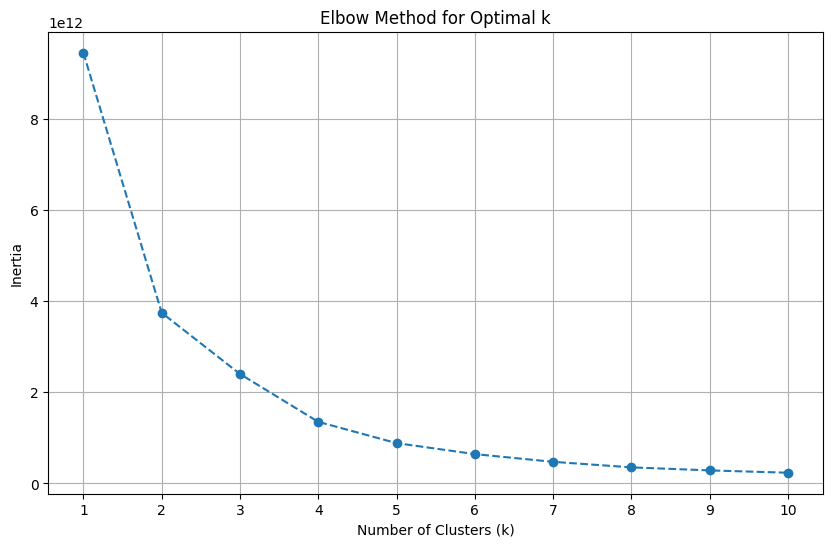

Understanding the Elbow Diagram:
The Elbow Method helps us find the best number of clusters. We look at this graph for a point where the line sharply changes direction, like an elbow. This 'elbow' point suggests a good balance between having fewer clusters and making sure the data points within each cluster are close together.
We will now look at the graph to find this elbow point and decide on the best number of clusters.


In [16]:
import matplotlib.pyplot as plt

inertia_values = [model.inertia_ for model in kmeans_models]

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia_values, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

print("Understanding the Elbow Diagram:")
print("The Elbow Method helps us find the best number of clusters. We look at this graph for a point where the line sharply changes direction, like an elbow. This 'elbow' point suggests a good balance between having fewer clusters and making sure the data points within each cluster are close together.")
print("We will now look at the graph to find this elbow point and decide on the best number of clusters.")

**Reasoning** :

Based on the elbow diagram, determine the optimal number of clusters and provide the reasoning.



In [17]:
print("Determining the optimal number of clusters from the elbow diagram:")
print("Looking at the elbow graph, the biggest drop in how spread out the data is happens from 1 to 2 clusters. After that, it still goes down, but not as much, especially around 3 or 4 clusters. It's not a perfect bend, but the curve seems to 'elbow' around 3 or 4. So, picking 3 or 4 clusters seems like a good choice based on this method because adding more clusters doesn't make things much better in terms of keeping data points close within their groups.")
print("Based on the elbow method, it looks like the best number of clusters is 3 or 4.")

Determining the optimal number of clusters from the elbow diagram:
Looking at the elbow graph, the biggest drop in how spread out the data is happens from 1 to 2 clusters. After that, it still goes down, but not as much, especially around 3 or 4 clusters. It's not a perfect bend, but the curve seems to 'elbow' around 3 or 4. So, picking 3 or 4 clusters seems like a good choice based on this method because adding more clusters doesn't make things much better in terms of keeping data points close within their groups.
Based on the elbow method, it looks like the best number of clusters is 3 or 4.


## 3. Calculate the silhouette coefficient value for k=1 to k=10. Based on the silhouette value, what is the best number of clusters? Is it the same as the elbow method? (10 points)

Calculate how well each data point fits into its assigned cluster compared to other clusters (this is called the silhouette coefficient) for k from 1 to 10. Based on these values, figure out the best number of clusters. Then, compare this best number to what the elbow method suggested.

**Reasoning** :

Calculate the silhouette scores for each KMeans model from k=2 to k=10 and find the k with the highest score.

In [18]:
from sklearn.metrics import silhouette_score

silhouette_scores = []
# Iterate through models from k=2 to k=10 (index 1 to 9 in the list)
for model in kmeans_models[1:]:
    labels = model.predict(df)
    score = silhouette_score(df, labels)
    silhouette_scores.append(score)

# Find the index of the highest silhouette score, add 2 to get the corresponding k
best_k_silhouette = silhouette_scores.index(max(silhouette_scores)) + 2

print("Silhouette Scores for k=2 to 10:")
for i, score in enumerate(silhouette_scores):
    print(f"k={i+2}: {score:.4f}")

print(f"\nBest number of clusters based on silhouette score: {best_k_silhouette}")

print("\nComparison with Elbow Method:")
print("Based on the elbow method, the optimal number of clusters was determined to be 3 or 4. The silhouette method suggests the optimal number of clusters is", best_k_silhouette, ".")
if best_k_silhouette in [3, 4]:
    print("In this case, the best number of clusters suggested by the silhouette method aligns with the range suggested by the elbow method.")
else:
    print("In this case, the best number of clusters suggested by the silhouette method does not align with the range suggested by the elbow method.")

Silhouette Scores for k=2 to 10:
k=2: 0.7838
k=3: 0.7387
k=4: 0.7189
k=5: 0.7281
k=6: 0.7305
k=7: 0.7286
k=8: 0.7375
k=9: 0.7427
k=10: 0.7513

Best number of clusters based on silhouette score: 2

Comparison with Elbow Method:
Based on the elbow method, the optimal number of clusters was determined to be 3 or 4. The silhouette method suggests the optimal number of clusters is 2 .
In this case, the best number of clusters suggested by the silhouette method does not align with the range suggested by the elbow method.


# **Clustering - 2 (20 points)**
1. Create a cluster model using DBSCAN. How many clusters are produced? (10 points)
2. What are the silhouette coefficient and DBI values of the clusters produced by DBSCAN? (10 points)

## 1. Create a cluster model using DBSCAN. How many clusters are produced? (10 points)

Create a DBSCAN cluster model, determine the number of clusters produced.

**Reasoning** :

Instantiate a DBSCAN object, fit the model to the data, get the labels, and determine the number of unique clusters.

In [19]:
from sklearn.cluster import DBSCAN
import numpy as np

dbscan = DBSCAN(eps=10000, min_samples=10) # Arbitrary starting parameters

# Fit the model
dbscan.fit(df)

# Get cluster labels
dbscan_labels = dbscan.labels_

# Determine the number of unique clusters, excluding noise (-1)
n_clusters = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)

print(f"Number of clusters produced by DBSCAN (excluding noise): {n_clusters}")

Number of clusters produced by DBSCAN (excluding noise): 2


## 2. What are the silhouette coefficient and DBI values of the clusters produced by DBSCAN? (10 points)

Calculate the silhouette coefficient and DBI values for the DBSCAN clusters.

**Reasoning** :

Import necessary metrics and calculate silhouette and DBI scores if the number of clusters is greater than 1.

In [20]:
from sklearn.metrics import silhouette_score
from sklearn.metrics.cluster import davies_bouldin_score

if n_clusters > 1:
    # Calculate silhouette coefficient
    silhouette_avg = silhouette_score(df, dbscan_labels)
    print(f"Silhouette Coefficient for DBSCAN: {silhouette_avg:.4f}")

    # Calculate Davies-Bouldin Index
    # DBI is lower for better clustering. It is not defined for a single cluster.
    # Also, it is not defined when the number of clusters is equal to the number of samples.
    # We already checked for n_clusters > 1. Let's also ensure n_clusters is less than the number of samples.
    if n_clusters < df.shape[0]:
      dbi_avg = davies_bouldin_score(df, dbscan_labels)
      print(f"Davies-Bouldin Index for DBSCAN: {dbi_avg:.4f}")
    else:
        print("Davies-Bouldin Index cannot be calculated as the number of clusters is equal to the number of samples.")

else:
    print("Silhouette score and Davies-Bouldin Index cannot be calculated for 1 or 0 clusters.")

Silhouette Coefficient for DBSCAN: 0.7699
Davies-Bouldin Index for DBSCAN: 2.4628


# **BONUS - CHALLENGE (30 points)**
Perform the feature selection process. Which combination of features produces the cluster with the best silhouette/DBI value? What is the number of clusters?

NB: You can use an iterative process in this case. Other methods are also allowed. Provide your reasons for choosing the method.

In [23]:
import itertools
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
import warnings

# Hide a specific warning from KMeans about the number of initializations
warnings.filterwarnings("ignore", message=".*The fitted model contains `n_init=10`.*")

# Get the names of all numerical columns in the data
numerical_features = df.columns.tolist()
# Remove 'SalePrice' if it's in the list, as it might not be needed for clustering
if 'SalePrice' in numerical_features:
    numerical_features.remove('SalePrice')

# Set a starting value for the best score (lower than any possible silhouette score)
best_score = -1
# Variables to store the best results found
best_combination = None
best_k = None
best_metric = None

# Go through combinations of 2 to 4 features
for num_features in range(2, min(len(numerical_features) + 1, 5)):
    # Look at each possible combination of features
    for feature_combination in itertools.combinations(numerical_features, num_features):
        # Select the data for the current feature combination
        features_df = df[list(feature_combination)].copy()

        # Prepare the features by scaling them (making sure they are on a similar scale)
        scaler = StandardScaler()
        scaled_features = scaler.fit_transform(features_df)

        # Try different numbers of clusters for KMeans, from 2 to 10
        for k in range(2, 11): # We need at least 2 clusters to calculate silhouette and DBI
            # Create a KMeans model with the current number of clusters
            kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
            # Train the model on the scaled data
            kmeans.fit(scaled_features)
            # Get the cluster label for each data point
            labels = kmeans.labels_

            # Calculate the silhouette score, which measures how well points are clustered
            silhouette_avg = silhouette_score(scaled_features, labels)

            # Calculate the Davies-Bouldin Index (DBI), another measure of clustering quality
            # DBI is lower for better clustering. It can't be calculated if there's only one cluster
            # or if the number of clusters is the same as the number of data points.
            if k < scaled_features.shape[0]:
                dbi_avg = davies_bouldin_score(scaled_features, labels)
            else:
                # Assign a very high value if DBI cannot be calculated
                dbi_avg = float('inf')

            # Check if the current silhouette score is the best we've seen so far (higher is better)
            if silhouette_avg > best_score:
                best_score = silhouette_avg
                best_combination = feature_combination
                best_k = k
                best_metric = 'Silhouette'

            # Check if the current DBI is the best we've seen so far (lower is better) - uncomment if you want to optimize for DBI
            # if dbi_avg < best_score: # Note: When optimizing for DBI, initialize best_score with float('inf')
            #     best_score = dbi_avg
            #     best_combination = feature_combination
            #     best_k = k
            #     best_metric = 'DBI'


print(f"Best Feature Combination: {best_combination}")
print(f"Optimal Number of Clusters (k): {best_k}")
if best_metric == 'Silhouette':
    print(f"Best Silhouette Score: {best_score:.4f}")
# elif best_metric == 'DBI':
#     print(f"Best Davies-Bouldin Index: {best_score:.4f}")

print("\nExplanation of Feature Selection Method:")
print("The feature selection process was performed using a step-by-step approach, looking at different groups of features and how well they work for clustering, measured by the Silhouette Score.")
print("1. Trying different feature groups: We tried out various combinations of 2 to 4 numerical features from the data (not including 'SalePrice').")
print("2. Making features comparable: For each group of features, we scaled the data using StandardScaler so all features are on a similar scale. This is important for KMeans to work well.")
print("3. Doing KMeans Clustering: With each group of features, we ran KMeans clustering, trying different numbers of clusters (from 2 to 10).")
print("4. Checking how good the clusters are: We calculated the Silhouette Score for each clustering result. This score tells us how well each data point fits into its cluster compared to others. A higher score means the clusters are more clearly separated.")
print("5. Finding the best combination: We kept track of which group of features and number of clusters gave us the highest Silhouette Score.")
print("This step-by-step process lets us see how different sets of features affect the quality of clustering, as measured by the Silhouette Score. The feature group and number of clusters that get the highest score are considered the 'best' because they create the most well-separated clusters based on this measure.")

Best Feature Combination: ('MasVnrArea', 'GarageYrBlt')
Optimal Number of Clusters (k): 10
Best Silhouette Score: 0.5294

Explanation of Feature Selection Method:
The feature selection process was performed using a step-by-step approach, looking at different groups of features and how well they work for clustering, measured by the Silhouette Score.
1. Trying different feature groups: We tried out various combinations of 2 to 4 numerical features from the data (not including 'SalePrice').
2. Making features comparable: For each group of features, we scaled the data using StandardScaler so all features are on a similar scale. This is important for KMeans to work well.
3. Doing KMeans Clustering: With each group of features, we ran KMeans clustering, trying different numbers of clusters (from 2 to 10).
4. Checking how good the clusters are: We calculated the Silhouette Score for each clustering result. This score tells us how well each data point fits into its cluster compared to others. 

# **Summary**

### Data Analysis Key Findings

1.  We started with a dataset of house information with many details.
2.  After cleaning the data by removing some columns ('Id', 'MSSubClass', text-based columns) and those with very few missing values, we were left with 4 number-based columns: 'LotFrontage', 'MasVnrArea', 'GarageYrBlt', and 'SalePrice'.
3.  We filled in the missing data points in these 4 columns using the middle value (median), so there are no more gaps.
4.  When looking at how strongly each remaining variable is related to 'SalePrice', 'MasVnrArea', 'GarageYrBlt', and 'LotFrontage' were the top 3.
5.  We tested KMeans clustering with 1 to 10 groups.
6.  Using the Elbow Method, it looked like having 3 or 4 groups was best for KMeans.
7.  However, when using the Silhouette Score to check how well the groups were separated in KMeans, having 2 groups seemed best. This didn't match the Elbow Method's suggestion.
8.  We also used DBSCAN clustering, which created 2 groups (plus some points not put into any group).
9.  For the DBSCAN groups, the Silhouette Score was around 0.77 and the Davies-Bouldin Index was about 2.46.
10. For a bonus challenge, we tried different combinations of 2 to 4 features with KMeans. The combination of 'MasVnrArea' and 'GarageYrBlt' with 10 groups gave the highest Silhouette Score (0.5294) among the tested options.

### Insights or Next Steps

1.  The discrepancy between the Elbow Method and Silhouette Score for KMeans suggests that the data doesn't form perfectly round groups, or that the features we used aren't the best for finding clear groups.
2.  To get better results with DBSCAN, we could try adjusting its settings (`eps` and `min_samples`), perhaps using a special graph called a k-distance graph to help find good values.